In [1]:
import os
os.makedirs('output', exist_ok=True)

import sys
sys.path.append('../')

from utils import load_walksheds, overlay_wks
import geopandas as gpd
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

* walksheds contains the half-mile walksheds used previously
* Remove the numbers within the station names

In [3]:
wksp5, wksp75 = load_walksheds()

# Convenience stores

* Define convenience tag 
* Keep only the nodes
* Change the crs of the hotel points to match the walksheds
* Spatial join the hotels to the walksheds
* export to csv

In [4]:
tags = {'shop': ['convenience']} 

convenience = ox.features.features_from_bbox(39.2, 38.5, -76.7, -77.6, tags)

In [5]:
convenience = convenience[convenience.index.get_level_values('element_type') == 'node']

<Axes: >

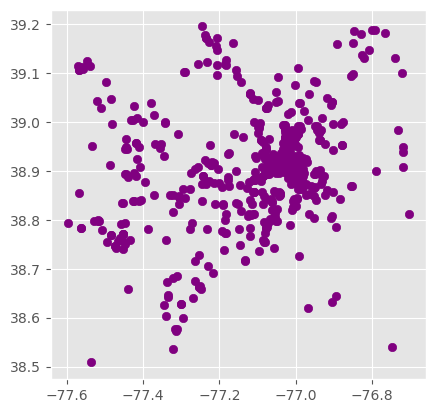

In [6]:
convenience.plot(color='purple')

In [7]:
convenience = convenience.to_crs('EPSG:4326')

In [8]:
convenience_walkshed_p5 = gpd.sjoin(wksp5, convenience )
convenience_walkshed_p75 = gpd.sjoin(wksp75, convenience )

In [9]:
convenience_by_station_p5 = convenience_walkshed_p5.groupby('Name_1')['index_right1'].count().rename('convenience_storecount_p5').reset_index()
convenience_by_station_p75 = convenience_walkshed_p75.groupby('Name_1')['index_right1'].count().rename('convenience_storecount_p75').reset_index()

convenience_by_station_p5.to_csv('output/convenience_by_station_p5.csv')
convenience_by_station_p75.to_csv('output/convenience_by_station_p75.csv')